<a href="https://colab.research.google.com/github/AYUSHJAIN951/Bank_modelling/blob/master/BANK_MODELLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`BANK LOAN MODEL`**

In this Project we will making a model to be used in Banks to sort people who are more possible to opt for a Personal Loan 


Importing Datasets
Though Drive

In [375]:
import os
print(os.listdir("/content/drive/My Drive/INTERNSHIPSTUDIOPROJECT"))

['Bank_Personal_Loan_Modelling.xlsx']


Importing all the required libraries

*   OS
*   NUMPY
*   PANDAS
*   MATPLOTLIB
*   SEABORN
*   SCIPY
*   SKLEARN














In [376]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Checking the columns tags


In [377]:
data = pd.read_excel("/content/drive/My Drive/INTERNSHIPSTUDIOPROJECT/Bank_Personal_Loan_Modelling.xlsx", 'Data')
data.columns=["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]
data.head()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Check Datatype

In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observation:- **

all are integers and not null just CCAvg is a float datatype

Statistical Summary

In [379]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observation:- **

Experience cant be negative minimum 

shape

In [380]:
data.shape

(5000, 14)

**Observation:- **

there are 5000 row entries and 14 columns

Checking Null Values


In [381]:
data.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

**Observation:-**

 No Null Values

Experiencce has some noise which is making the Experience min to be -3
so need to clean the noise

In [382]:
data[data['Experience']<0]['Experience'].count()

52

In [383]:
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist()
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [384]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

data[data['Experience'] < 0]['Experience'].count()

0

In [385]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observation:-** 

Noise in Experience has been removed
By changing the values which are lesser than 0 to medians

In [386]:
data.nunique()

ID                   5000
Age                    45
Experience             44
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

ID :- This attribute can be dropped.Though the data distribution is **normal**
 ZIP Code: The attribute has sharp peaks telling the data from particular places are collected more.Spread is also less in the sample. More data from different places can be collected. 

In [387]:
data.drop(["ID","ZIPCode"],axis=1)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,0,1,0
4996,30,4.0,15,4,0.4,1,85,0,0,0,1,0
4997,63,39.0,24,2,0.3,3,0,0,0,0,0,0
4998,65,40.0,49,3,0.5,2,0,0,0,0,1,0


So droping it will be more feasible in the model

In [388]:
(data["Mortgage"]==0).value_counts()

True     3462
False    1538
Name: Mortgage, dtype: int64

3462 people have 0 Mortgage

In [389]:
(data["PersonalLoan"]==0).value_counts()

True     4520
False     480
Name: PersonalLoan, dtype: int64

4520 people have 0 PersonalLoan

In [390]:
(data["CreditCard"]==0).value_counts()

True     3530
False    1470
Name: CreditCard, dtype: int64

3530 people have no CreditCard

In [391]:
(data["Online"]==0).value_counts()

False    2984
True     2016
Name: Online, dtype: int64

2984 people have no online banking

In [392]:
(data["CDAccount"]==0).value_counts()

True     4698
False     302
Name: CDAccount, dtype: int64

4698 people have 0 CD Account

In [393]:
(data["SecuritiesAccount"]==0).value_counts()

True     4478
False     522
Name: SecuritiesAccount, dtype: int64

4478 people have no SecuritiesAccount

In [394]:
(data["Education"]).value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

1    2096
3    1501
2    1403 
Distribution of Education Levels

In [395]:
(data["Family"]).value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Distribution of Family member levels
1    1472
2    1296
4    1222
3    1010





In [396]:
(data["CCAvg"]==0).value_counts()

False    4894
True      106
Name: CCAvg, dtype: int64

CCAvg of 106 people is 0

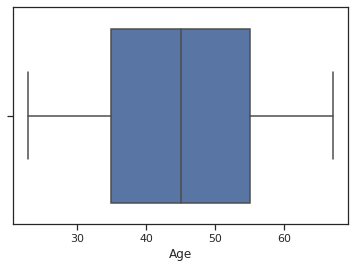

In [397]:
sns.boxplot(data["Age"] )


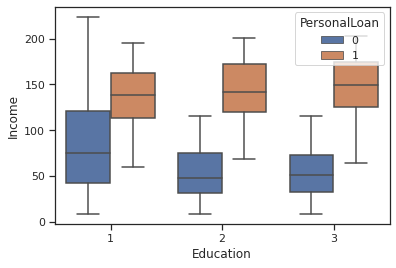

In [398]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

**Observation**

Through this it can be observed Education level 1 has more Income level than other Education levels 
And people having personal loans looks like having almost same income and Education levels

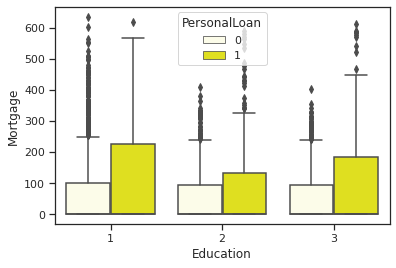

In [399]:
sns.boxplot(x="Education",y="Mortgage",hue="PersonalLoan", data=data, color='Yellow')

**Observation:**

 From the above chart it seems that customer who have personal loan have higher mortgage than customer who dont have personal

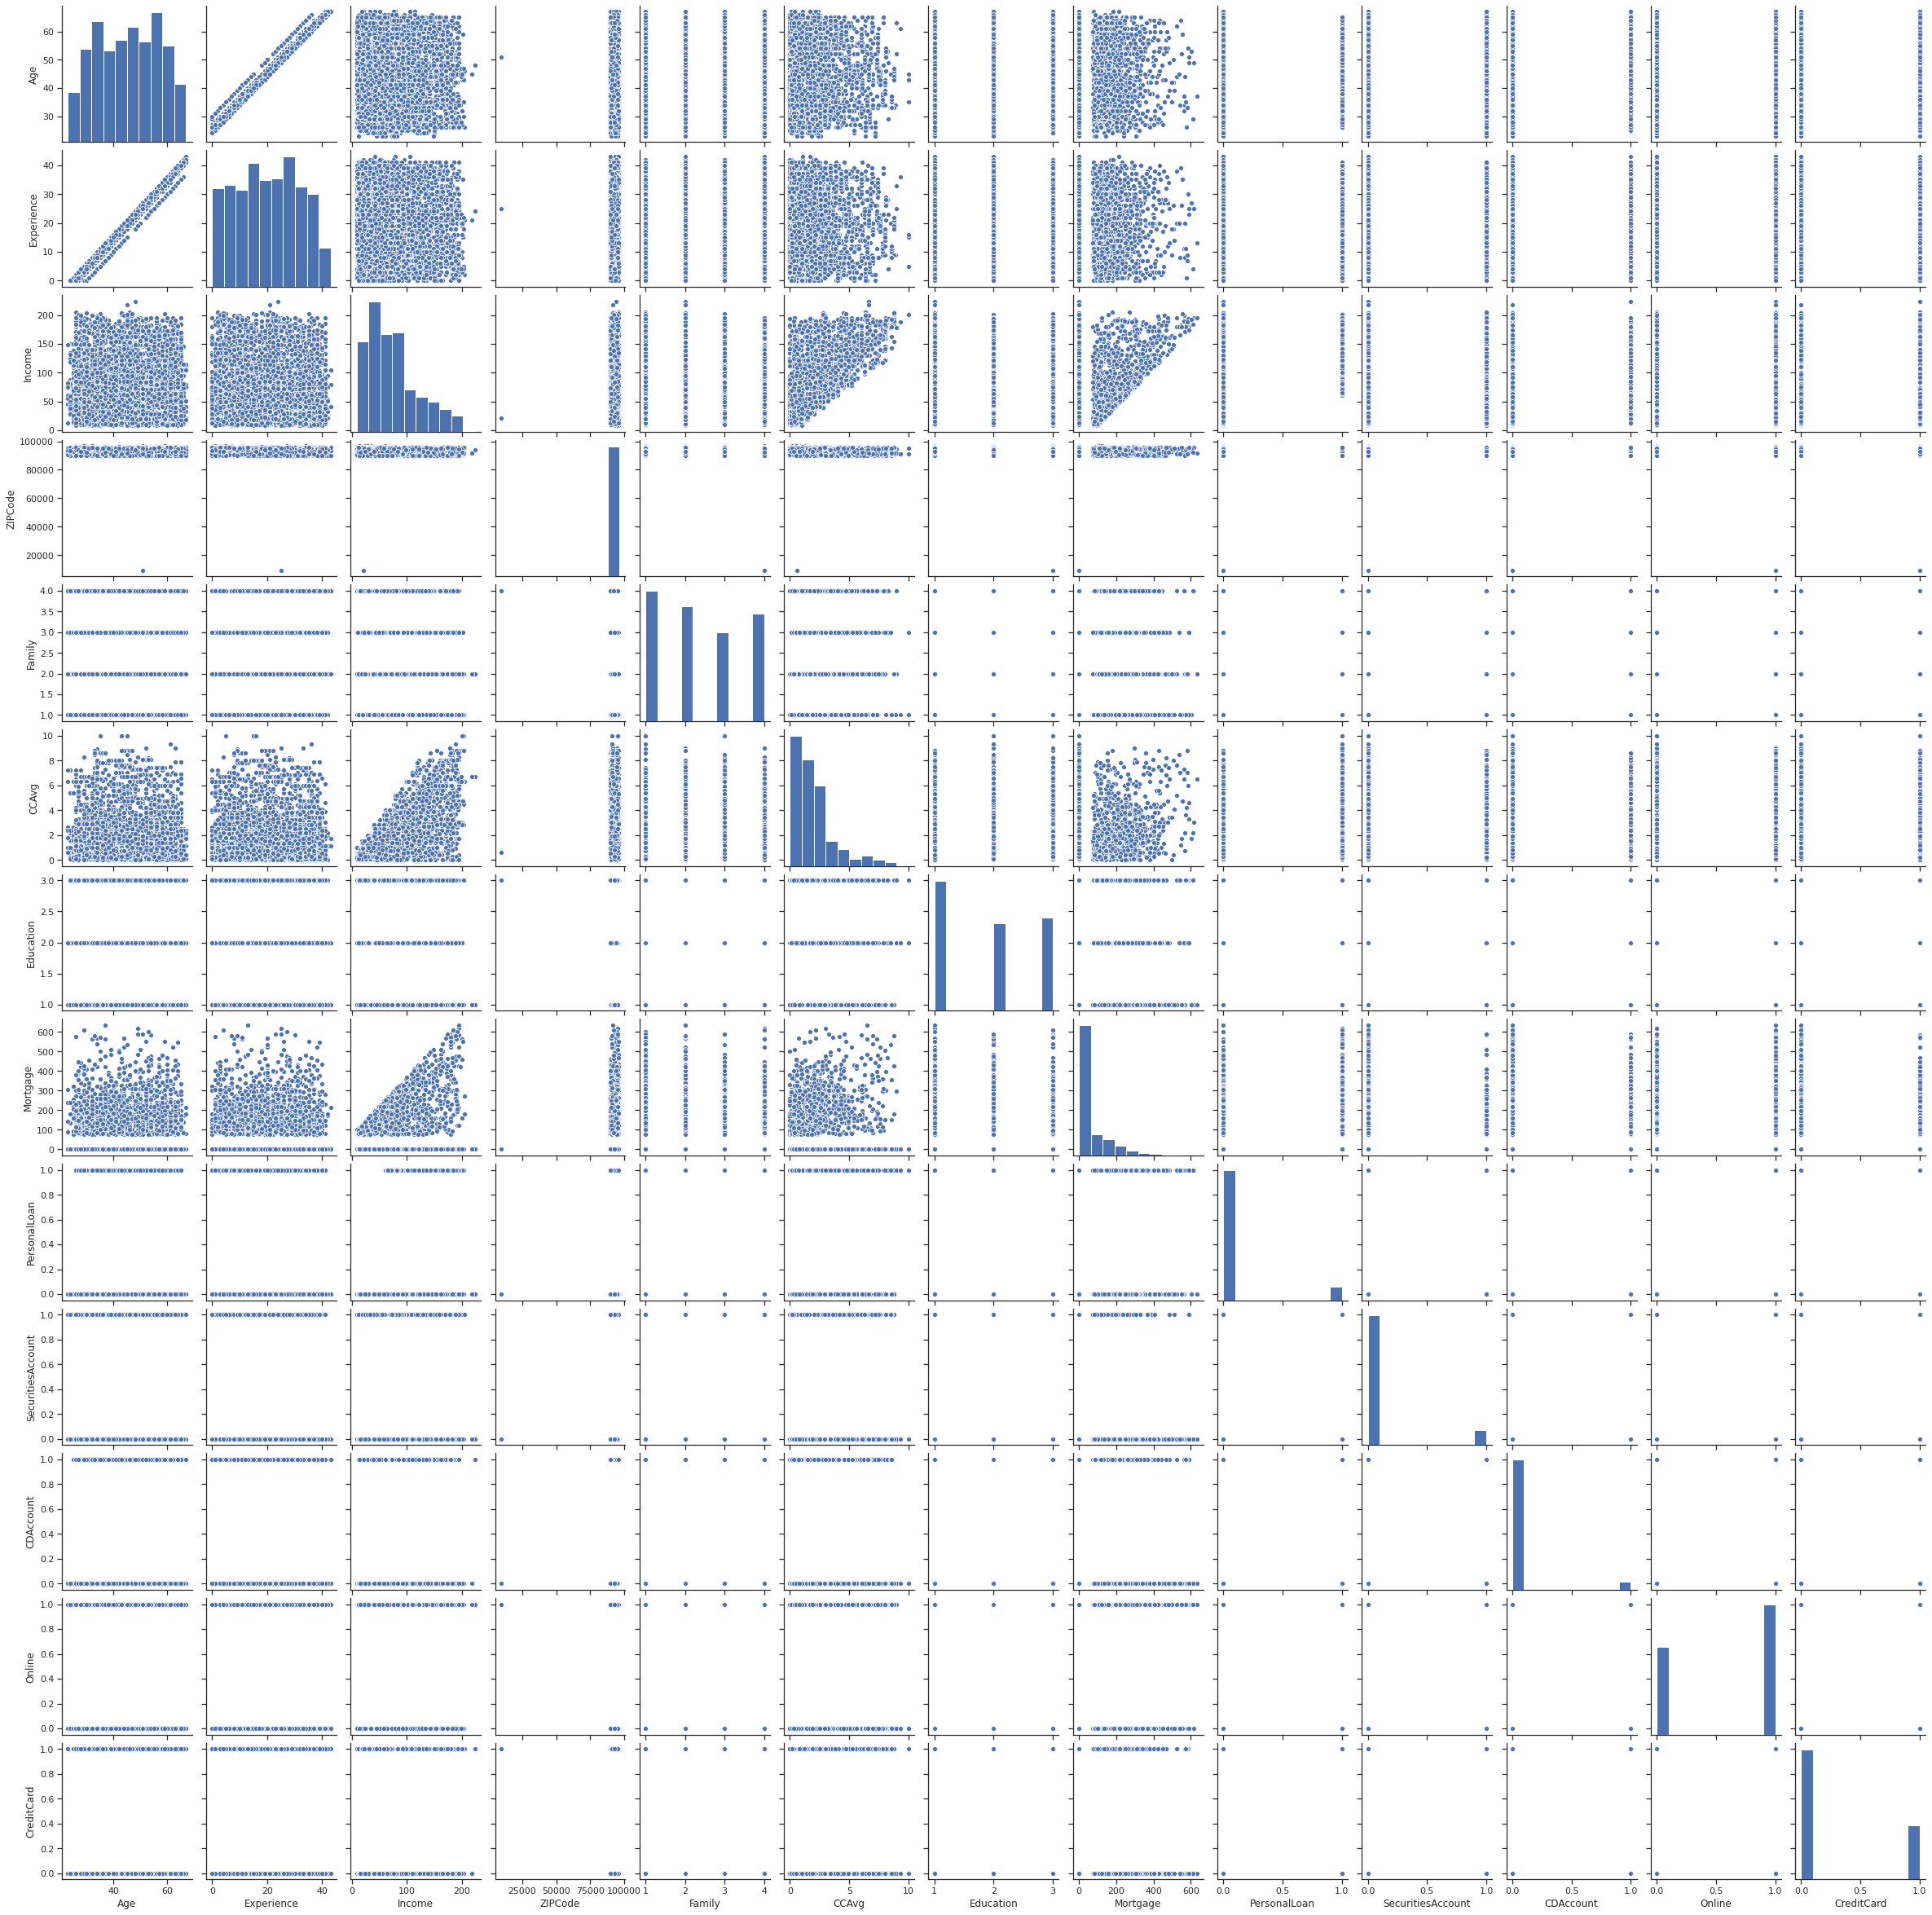

In [400]:
sns.pairplot(data.iloc[:,1:])


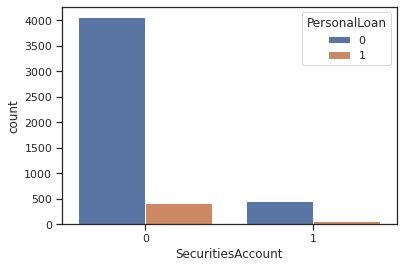

In [401]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

**Observation :** 

Majority of customers who does not have loan have securities account

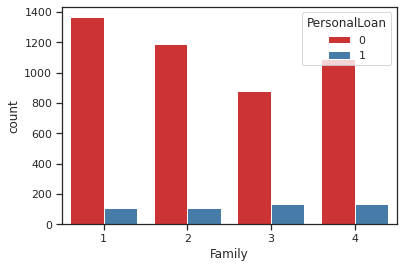

In [402]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set1')


**Observation:**

Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

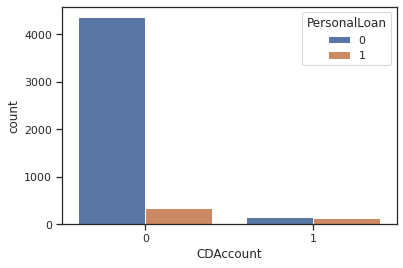

In [403]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')


**Observation:**

 Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

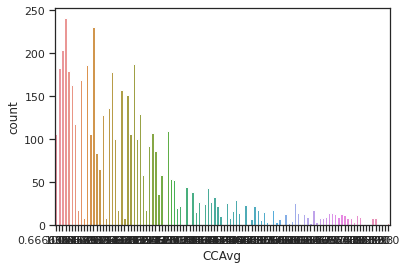

In [404]:
sns.countplot(x='CCAvg',data=data)

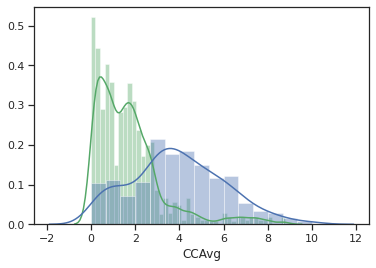

In [405]:
sns.distplot(data[data.PersonalLoan == 0]['CCAvg'], color ='g')
sns.distplot( data[data.PersonalLoan == 1]['CCAvg'],color= 'b')

In [406]:
print('Avg CC spending of NON LOAN customer: ', data[data.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Avg CC spending of LOAN customer: ', data[data.PersonalLoan == 1]['CCAvg'].median()*1000)

Avg CC spending of NON LOAN customer:  1400.0
Avg CC spending of LOAN customer:  3800.0


**Observation: **

The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0, 0.5, 'Age')

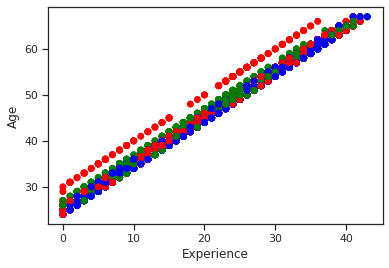

In [407]:
fig , ax = plot.subplots()
colors = {1:'blue',2:'Green',3:'red'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

**Observation**

The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

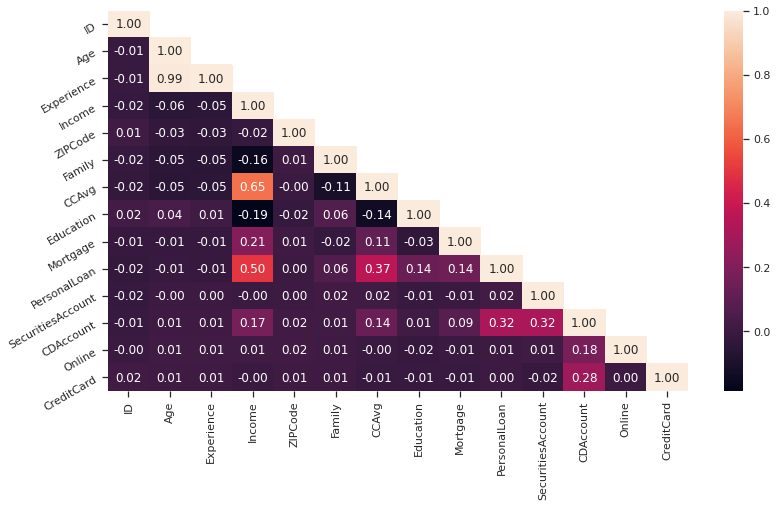

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


**Observation**



*  Income and CCAvg is moderately correlated.
*  Age and Experience is highly correlated




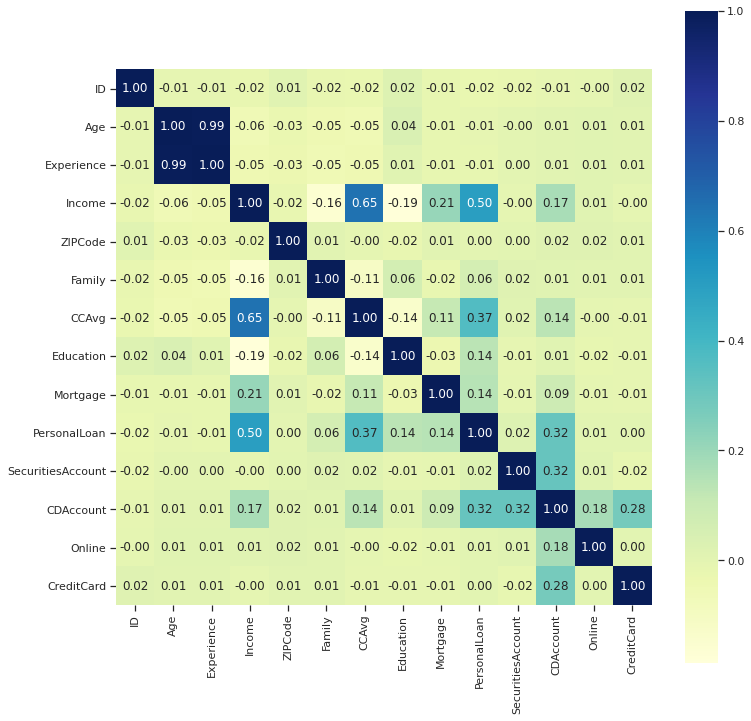

In [409]:
corr=data.corr()
fig,ax=plot.subplots(figsize=(12,12))
ax=sns.heatmap(corr,annot=True,square=True,fmt=".2f",cmap="YlGnBu")


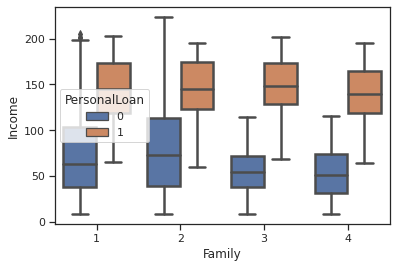

In [410]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)


Families with lesser than 100k income have lesser tendency to take loans

MODELS
TRAIN DATASEST 70 % OUT OF DATA
TEST DATASET 30% OUT OF DATA

In [411]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['ID','Experience',"ZIPCode"], axis=1), test_size=0.3 , random_state=50)
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12340)


In [412]:
train_labels.shape

(3500,)

In [413]:
train_set.shape

(3500, 10)

Logistic Regression

In [414]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X,y)
print(model1.score(x_test,y_test))
y_predict=model1.predict(x_test)
y_predict

0.9486666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 0, 0, 0])

In [415]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.051333333333333335
Root Mean Squared Error 0.22656860623955238
R2 Score 0.37737191650853896


**Decision tree classifier**

Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

Advantages: Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.

Disadvantages: Decision tree can create complex trees that do not generalise well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

In [416]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(X,y)
print(model2.score(x_test,y_test))
model2.fit(train_set, train_labels)

0.982


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [417]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.051333333333333335
Root Mean Squared Error 0.22656860623955238
R2 Score 0.37737191650853896


In [418]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier

# dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
# dt_model.fit(train_set, train_labels)

In [419]:
# dt_model.score(test_set , test_labels)

In [420]:
# y_predict = dt_model.predict(test_set)
# y_predict[:5]

In [421]:
test_set.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
3431,64,63,2,1.700000,3,184,1,0,1,0
2042,41,121,1,0.300000,1,0,0,0,1,0
79,50,19,2,0.400000,1,118,0,0,1,0
4663,28,115,1,1.900000,1,200,0,0,1,0
3640,64,53,4,1.666667,3,0,0,0,0,1


**NAYES BAYES**

Definition: Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

Advantages: This algorithm requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.

Disadvantages: Naive Bayes is is known to be a bad estimator.[link text](https://)

In [422]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)
prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)


0.8753333333333333

**Random Forest classifier**

Definition: Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

Advantages: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.

Disadvantages: Slow real time prediction, difficult to implement, and complex algorithm.

In [423]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

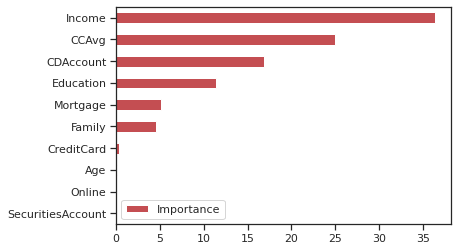

In [424]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [425]:
predicted_random=randomforest_model.predict(test_set)
randomforest_model.score(test_set,test_labels)

0.9173333333333333

**KNN ( K - Nearest Neighbour )**

Definition: Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

Advantages: This algorithm is simple to implement, robust to noisy training data, and effective if training data is large.

Disadvantages: Need to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples.

In [426]:
train_set_indep = data.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_dep = data["PersonalLoan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [427]:

knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)


0.9106070713809206


In [428]:
X=data.drop(['PersonalLoan','ZIPCode','Experience','ID'],axis=1)
y=data.pop('PersonalLoan')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.940600 (0.007102)
KNN: 0.914600 (0.011351)
CART: 0.983600 (0.003323)
NB: 0.883000 (0.011567)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.987600 (0.003323)


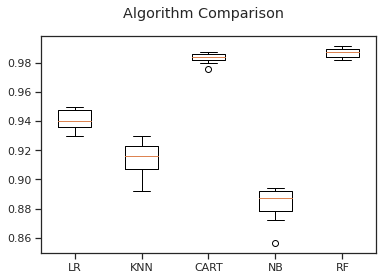

In [429]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Bussiness understanding of model**


The Bank Model Goal is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.

LR: 0.940600 (0.007102)

KNN: 0.914600 (0.011351)

CART: 0.983600 (0.003200)

NB: 0.883000 (0.011567)

RF: 0.987000 (0.003924)



From the above result,it is clear that Random Forest classifier is the best algorithm for predicting whether the customer will opt for personal loans or not.